In [1]:
import pandas as pd
raw_df=pd.read_excel('admit.xlsx')

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
 4   gender  400 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


In [3]:
raw_df.head()

,admit,gre,gpa,rank,gender
0,1,660,3.67,3,Male
1,1,800,4.00,1,Female
2,1,640,3.19,4,Male
3,1,760,3.00,2,Male
4,1,560,2.98,1,Female


In [4]:
##--------------------------------------
##Identify the class label or Y variable 
#making y variable as categorical
##--------------------------------------
Y=raw_df.admit.astype('category')
print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: admit
Non-Null Count  Dtype   
--------------  -----   
400 non-null    category
dtypes: category(1)
memory usage: 656.0 bytes
None


In [5]:
raw_df.admit

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

In [15]:
##------------------------------------------------------------
##Select the predictor variables into a list called X_features
##------------------------------------------------------------
X_features = list(raw_df.columns)
X_features.remove('admit')
print(X_features)

['gre', 'gpa', 'rank', 'gender']


In [16]:
##------------------------------------------------------------
##Setup a dataframe with only X-variables
##------------------------------------------------------------
X=raw_df[X_features]

In [17]:
X

,gre,gpa,rank,gender
0,660,3.67,3,Male
1,800,4.00,1,Female
2,640,3.19,4,Male
3,760,3.00,2,Male
4,560,2.98,1,Female
...,...,...,...,...
395,620,4.00,2,Female
396,560,3.04,3,Male
397,460,2.63,2,Female
398,700,3.65,2,Male


In [19]:
##------------------------------------------
##Split the data into Training and Test
##test size=0.3 indicating 70% training and
##30% test data
##------------------------------------------
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
Y,
test_size=0.3,
random_state=500)
print(y_train.info())

#########################################################################
## All data processing should be done after split to prevent data leakage
#########################################################################                                                 

<class 'pandas.core.series.Series'>
Index: 280 entries, 266 to 346
Series name: admit
Non-Null Count  Dtype   
--------------  -----   
280 non-null    category
dtypes: category(1)
memory usage: 2.6 KB
None


In [20]:
X_train

,gre,gpa,rank,gender
266,380,3.59,4,Male
369,400,3.36,2,Female
378,480,2.78,3,Male
359,520,3.15,3,Male
42,700,3.52,4,Male
...,...,...,...,...
287,540,3.02,4,Female
206,720,3.84,3,Female
273,740,3.54,1,Female
321,660,3.45,4,Male


In [21]:
#####################
## Pre-process X-vars
#####################

##---------------------------------------------------------------------
## 1. Identify and dummy code (one-hot encoding) the categorical column
##---------------------------------------------------------------------
## list of categorical columns
categorical_columns = ['gender']
X_train_encoded = pd.get_dummies(X_train,columns=categorical_columns,drop_first=True,dtype=int)
X_test_encoded = pd.get_dummies(X_test,columns=categorical_columns,drop_first=True,dtype=int)

In [22]:
X_test_encoded

,gre,gpa,rank,gender_Male
288,480,3.43,2,0
108,540,3.78,2,1
217,640,2.79,2,0
70,520,3.81,1,1
330,520,3.25,3,0
...,...,...,...,...
59,780,3.80,3,1
79,520,3.90,3,1
293,620,3.05,2,1
249,540,2.81,3,0


In [23]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 288 to 107
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gre          120 non-null    int64  
 1   gpa          120 non-null    float64
 2   rank         120 non-null    int64  
 3   gender_Male  120 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 4.2 KB


In [24]:
X_train_encoded

,gre,gpa,rank,gender_Male
266,380,3.59,4,1
369,400,3.36,2,0
378,480,2.78,3,1
359,520,3.15,3,1
42,700,3.52,4,1
...,...,...,...,...
287,540,3.02,4,0
206,720,3.84,3,0
273,740,3.54,1,0
321,660,3.45,4,1


In [25]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 266 to 346
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gre          280 non-null    int64  
 1   gpa          280 non-null    float64
 2   rank         280 non-null    int64  
 3   gender_Male  280 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 9.8 KB


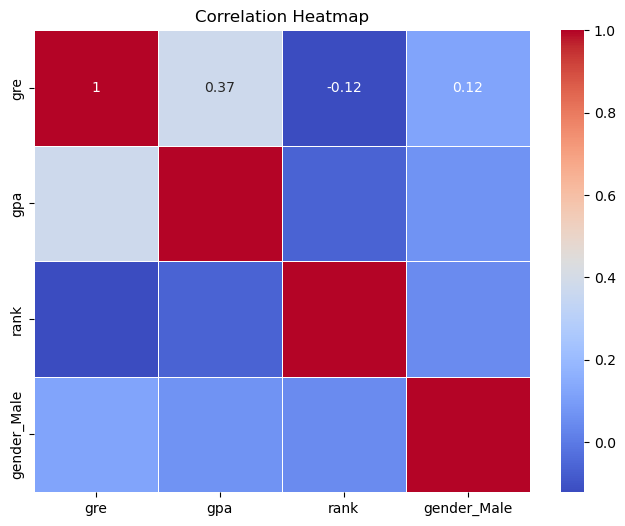

In [26]:
##-------------------------------------------------
## 2. Identify and remove highly correlated columns
##-------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
corr_matrix

,gre,gpa,rank,gender_Male
gre,1.000000,0.374043,-0.121420,0.122734
gpa,0.374043,1.000000,-0.063109,0.070004
rank,-0.121420,-0.063109,1.000000,0.048427
gender_Male,0.122734,0.070004,0.048427,1.000000


In [28]:
##----------------------
## Build the logit model
##----------------------
import statsmodels.api as sm
## Constant is to be added when using the sm library
X_train_encoded=sm.add_constant(X_train_encoded)
## Call logistic regression with X and Y variables of the training data
## Model is built with the training data
logit=sm.Logit(y_train,X_train_encoded)
## Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.559919
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: admit            Pseudo R-squared: 0.112     
Date:               2024-09-24 19:45 AIC:              323.5549  
No. Observations:   280              BIC:              341.7288  
Df Model:           4                Log-Likelihood:   -156.78   
Df Residuals:       275              LL-Null:          -176.56   
Converged:          1.0000           LLR p-value:      5.3105e-08
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -3.6549    1.4347  -2.5474  0.0109  -6.4669  -0.8429
gre            0.0028    0.0013   2.1567  0.0310   0.0003   0.

In [29]:
#Only significant X-vars are used to build the predictive model
#All variables are significant-so we use all the x-VARS

In [30]:
##-----------------------------
## Apply model on test data
##-----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
y_prob=logit_model.predict(X_test_encoded)
#y_prob holds the probability values for each record in the test data

In [31]:
y_prob

288    0.198445
108    0.477907
217    0.208868
70     0.610000
330    0.122841
         ...   
59     0.505709
79     0.343836
293    0.424929
249    0.102109
107    0.279587
Length: 120, dtype: float64

In [32]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame({ "actual_Y": y_test, "predicted_prob": y_prob})

print(y_pred_df.head())

    actual_Y  predicted_prob
288        0        0.198445
108        1        0.477907
217        0        0.208868
70         1        0.610000
330        0        0.122841


In [33]:
##-----------------------------
## Based on default cut-off -0.5
##-----------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

    actual_Y  predicted_prob  predicted_Y
288        0        0.198445            0
108        1        0.477907            0
217        0        0.208868            0
70         1        0.610000            1
330        0        0.122841            0


In [34]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
print(cm)

[[79  5]
 [22 14]]


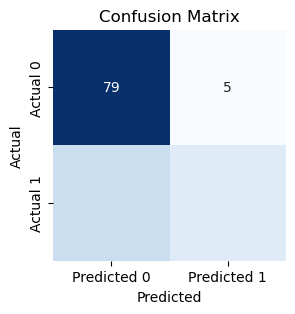

In [35]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.39
Accuracy: 0.78


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'], y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        84
           1       0.74      0.39      0.51        36

    accuracy                           0.78       120
   macro avg       0.76      0.66      0.68       120
weighted avg       0.77      0.78      0.75       120



In [43]:
#Implications/Recommendations
#78% Accuracy
#39% sensitivity how well True positive is predicted out of all positive case
#94% specificity how well True negative is predicted out of all negative case

#39% credit rating => Cannot accept the model at this threshold of 0.5

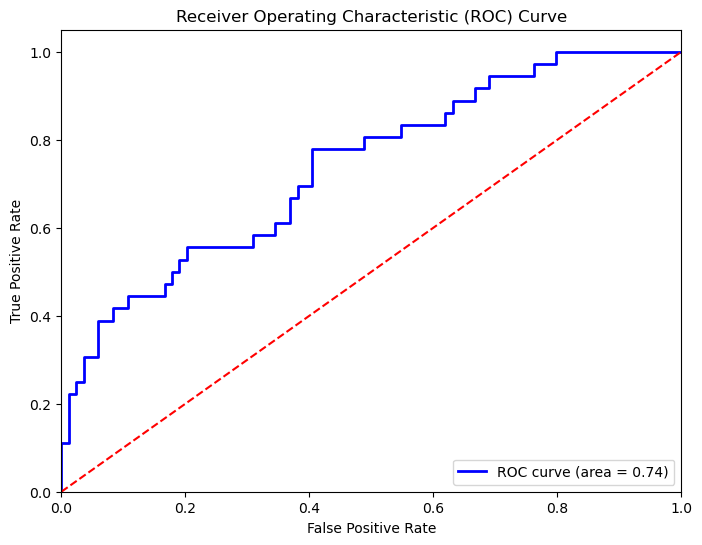

In [39]:
# Plot ROC curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])
roc_auc = auc(fpr, tpr)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).
    
    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """
    
    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
        
        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        
        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)
    
    # Print the sensitivity table
    print(sensitivity_table)

In [42]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           1.000000
1        0.11           1.000000
2        0.12           1.000000
3        0.13           0.972222
4        0.14           0.972222
5        0.15           0.972222
6        0.16           0.944444
7        0.17           0.944444
8        0.18           0.944444
9        0.19           0.916667
10       0.20           0.888889
11       0.21           0.833333
12       0.22           0.805556
13       0.23           0.805556
14       0.24           0.805556
15       0.25           0.777778
16       0.26           0.777778
17       0.27           0.777778
18       0.28           0.694444
19       0.29           0.666667
20       0.30           0.638889
21       0.31           0.611111
22       0.32           0.611111
23       0.33           0.583333
24       0.34           0.583333
25       0.35           0.555556
26       0.36           0.555556
27       0.37           0.555556
28       0.38           0.555556
29       0